# Stackoverflow Developer Survey 2024 Analysis

### Introduction

This project aims to analyze the 2024 Stack Overflow Developer Survey data. 
We will explore:
1. The most popular programming languages among developers.
2. General insights about developers.

and I will be focused on top 10 programming languages used.

## Data Understanding

#### Libraries :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [4]:
import pandas as pd
df = pd.read_csv("survey_results_public.csv")



# Display the first 5 rows.
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### Data Cleaning :

In [5]:
# Columns will be needed in the  analysis
df = df.dropna(subset=["Country", "LanguageHaveWorkedWith"])

languagescountry = df[["Country", "LanguageHaveWorkedWith"]].copy()
languagescountry["LanguageHaveWorkedWith"] = languagescountry["LanguageHaveWorkedWith"].str.split(';')
languagescountry = languagescountry.explode("LanguageHaveWorkedWith")


languagescountry["LanguageHaveWorkedWith"] = languagescountry["LanguageHaveWorkedWith"].str.strip()

#### Best 10 programming languages

In [6]:
languagescountry["LanguageHaveWorkedWith"].value_counts().head(10)

LanguageHaveWorkedWith
JavaScript                 36225
HTML/CSS                   30765
SQL                        29781
Python                     29727
TypeScript                 22450
Bash/Shell (all shells)    19959
Java                       17559
C#                         15830
C++                        13345
C                          11750
Name: count, dtype: int64

In [9]:
languagesbycountry = (
    languagescountry.groupby(["Country", "LanguageHaveWorkedWith"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Country", "Count"], ascending=[True, False])
)

##### Visualization 

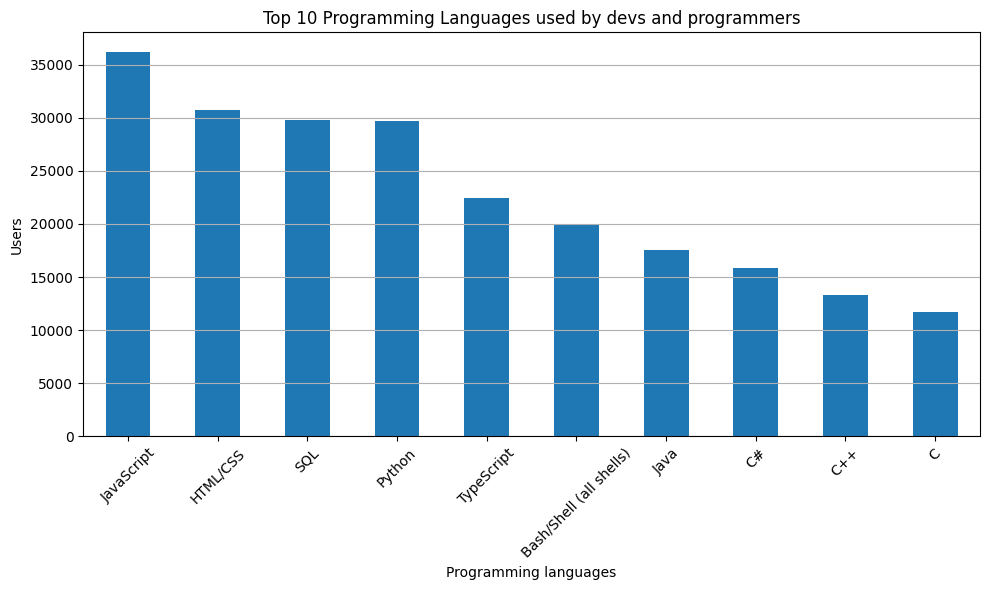

In [16]:
df = df.dropna(subset=["Country", "LanguageHaveWorkedWith"])


languagesbycountry = df[["Country", "LanguageHaveWorkedWith"]].copy()
languagesbycountry["LanguageHaveWorkedWith"] = languagesbycountry["LanguageHaveWorkedWith"].str.split(';')

languagesbycountry = languagesbycountry.explode("LanguageHaveWorkedWith")

languagesbycountry["LanguageHaveWorkedWith"] = languagesbycountry["LanguageHaveWorkedWith"].str.strip()




toplangs = languagesbycountry["LanguageHaveWorkedWith"].value_counts().head(10)

# The Visualization using matplotlib "bar chart"
plt.figure(figsize=(10, 6))
toplangs.plot(kind='bar')
plt.title("Top 10 Programming Languages used by devs and programmers")
plt.xlabel("Programming languages")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()


##### In visualization we notice the `Javascript`- `Python` is best **High level programming language** to learning in 2024 , and see a `SQL` a query language and `HTML/CSS` the markup languages for web development is very important.

### Inside thing : Top databases for users

In [ ]:
databases = df.dropna(subset=["DatabaseHaveWorkedWith"])

databases["DatabaseHaveWorkedWith"] = databases["DatabaseHaveWorkedWith"].str.split(';')
databases = databases.explode("DatabaseHaveWorkedWith")
databases["DatabaseHaveWorkedWith"] = databases["DatabaseHaveWorkedWith"].str.strip()

top_databases = databases["DatabaseHaveWorkedWith"].value_counts().head(10)
top_databases



C:\Users\saad7\AppData\Local\Temp\ipykernel_22744\816936419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databases["DatabaseHaveWorkedWith"] = databases["DatabaseHaveWorkedWith"].str.split(';')


DatabaseHaveWorkedWith
PostgreSQL              24794
MySQL                   20277
SQLite                  16872
Microsoft SQL Server    12901
MongoDB                 12500
Redis                   10193
MariaDB                  8734
Elasticsearch            6371
Oracle                   5057
Dynamodb                 4014
Name: count, dtype: int64

##### Visualization :

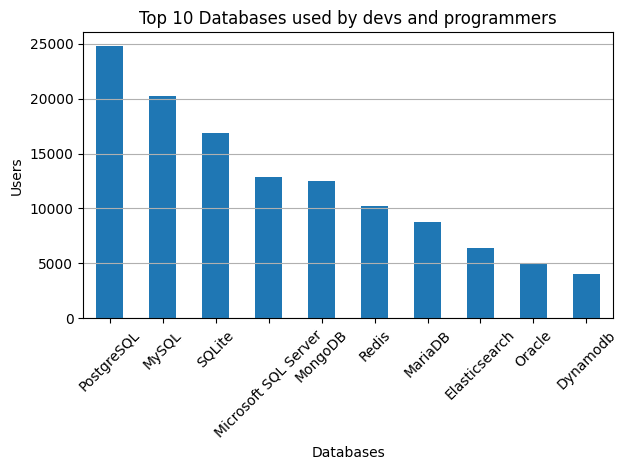

In [18]:
top_databases.plot(kind='bar')
plt.title("Top 10 Databases used by devs and programmers")
plt.xlabel("Databases")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')



plt.show()

##### In visualization we notice the `PostgreSQL` and `MySQL` is best RDBMS using by users.

### Inside thing : Developers jobs

In [21]:
# Simple cleaning for data
dev = df.dropna(subset=["DevType"])
dev["DevType"] = dev["DevType"].str.split(';')
dev = dev.explode("DevType")
dev["DevType"] = dev["DevType"].str.strip()



# show the top 15 devs types
top_dev_types = dev["DevType"].value_counts().head(15)
top_dev_types

C:\Users\saad7\AppData\Local\Temp\ipykernel_22744\3165215876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["DevType"] = dev["DevType"].str.split(';')


DevType
Developer, full-stack                            17667
Developer, back-end                               9576
Student                                           4894
Developer, front-end                              3197
Developer, desktop or enterprise applications     2408
Other (please specify):                           2309
Developer, mobile                                 1935
Developer, embedded applications or devices       1580
Engineering manager                               1238
Academic researcher                               1178
Data engineer                                     1083
DevOps specialist                                  987
Data scientist or machine learning specialist      983
Research & Development role                        899
Senior Executive (C-Suite, VP, etc.)               810
Name: count, dtype: int64

##### Devs in 2024 very interested in `web developement` :
1. Full stack (including front end - back end)
2. Back end developers

others fields is :
1. Desktop Development (Windows-Linux-Mac OS)
2. Mobile Development (Webapps - Android - iOS)

And also we noticed the `devops` and `data engineering/science` have a good place in a list. 

### Credits :

`0xSaad / Saad Almalki`
- [X](https://x.com/0xdonzdev)
- [Github](https://github.com/Saad711T)
- [LinkedIn](https://www.linkedin.com/in/saadalmalki711)

For see Stackoverflow 2017 Developers survey analysis , [Click here](https://github.com/Saad711T/Udacity-IntroductionToDataScience).